In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import math
from scipy.special import gamma

In [2]:
# kaiming initialization for linear network
def kaiming_linear(m,h):
    return torch.randn(m,h)*math.sqrt(1/m)

# our initialization for linear network
def new_linear(m,h):
    return torch.randn(m,h)*math.sqrt(1/m+0.5/m**2)

# kaiming initialization for relu network
def kaiming_relu(m,h):
    return torch.randn(m,h)*math.sqrt(2/m)

# our initialization for relu network
def new_relu(m,h,s=1):
    return torch.randn(m,h)*math.sqrt(2/m+5*(2-s)/(2*(m**2)))

# kaiming initialization for leaky relu
def kaiming_leaky(m,h):
    a=0.01
    temp=2/(1+a*a)
    return torch.randn(m,h)*math.sqrt(temp/m)

# our initialization for leaky relu
def new_leaky(m,h,s=1):
    a=0.01
    temp=2/(1+a*a)/m+(2-s)*((5*s-24)*a*a+10)/(2*(s+2)*a*a+4)/m/m
    return torch.randn(m,h)*math.sqrt(temp)

In [3]:
# norm of output of linear network
norm1=[]
for i in range(100):
    torch.manual_seed(i)
    x=torch.randn(64)
    for i in range(100):
        a=kaiming_linear(64,64)
        x=a@x
    nor=torch.norm(x)
    norm1.append((nor.item()))
norm2=[]
for i in range(100):
    torch.manual_seed(i)
    x=torch.randn(64)
    for i in range(100):
        a=new_linear(64,64)
        x=a@x
    nor=torch.norm(x)
    norm2.append((nor.item()))

In [4]:
# norm of output of relu network
norm3=[]
for i in range(100):
    torch.manual_seed(i)
    x=torch.randn(64)
    for i in range(100):
        a=kaiming_relu(64,64)
        x=F.relu(a@x)
    nor=torch.norm(x)
    norm3.append((nor.item()))
norm4=[]
for i in range(100):
    torch.manual_seed(i)
    x=torch.randn(64)
    for i in range(100):
        a=new_relu(64,64)
        x=F.relu(a@x)
    nor=torch.norm(x)
    norm4.append((nor.item()))

In [5]:
# norm of output of leaky relu network
norm5=[]
for i in range(100):
    torch.manual_seed(i)
    x=torch.randn(64)
    for i in range(100):
        a=kaiming_leaky(64,64)
        x=F.leaky_relu(a@x)
    nor=torch.norm(x)
    norm5.append((nor.item()))
norm6=[]
for i in range(100):
    torch.manual_seed(i)
    x=torch.randn(64)
    for i in range(100):
        a=new_leaky(64,64)
        x=F.leaky_relu(a@x)
    nor=torch.norm(x)
    norm6.append((nor.item()))

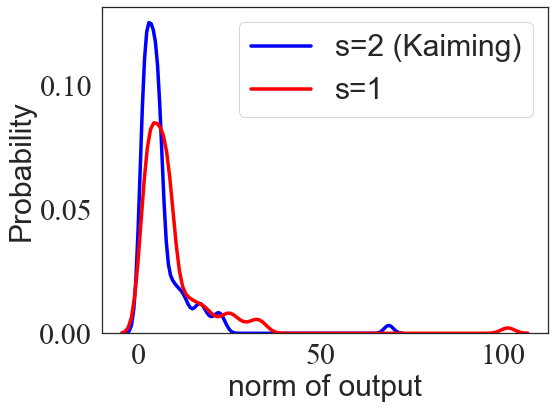

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
# linear figure
figsize = 8,6
fig, ax = plt.subplots(figsize=figsize)
sns.set(color_codes=True)
sns.set_style('white')
sns.kdeplot(norm1,color='blue',label='s=2 (Kaiming)',linewidth=3.5)
sns.kdeplot(norm2,color='red',label='s=1',linewidth=3.5)
plt.ylabel('Probability',fontsize=30)
plt.xlabel('norm of output',fontsize=30)
plt.tick_params(labelsize=30)
ax.legend(['s=2 (Kaiming)','s=1'], loc='upper right',fontsize=30)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]
plt.show()

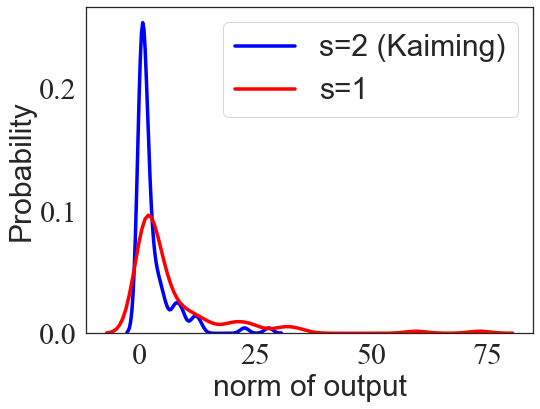

In [9]:
# relu figure
figsize = 8,6
fig, ax = plt.subplots(figsize=figsize)
sns.set(color_codes=True)
sns.set_style('white')
sns.kdeplot(norm3,color='blue',label='s=2 (Kaiming)',linewidth=3.5)
sns.kdeplot(norm4,color='red',label='s=1',linewidth=3.5)
plt.ylabel('Probability',fontsize=30)
plt.xlabel('norm of output',fontsize=30)
plt.tick_params(labelsize=30)
ax.legend(['s=2 (Kaiming)','s=1'], loc='upper right',fontsize=30)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]
plt.show()

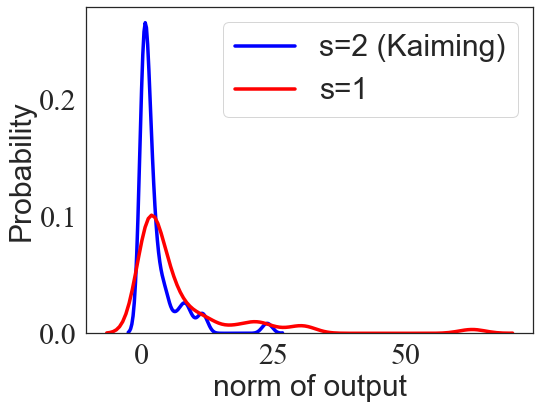

In [10]:
# leaky relu figure
figsize = 8,6
fig, ax = plt.subplots(figsize=figsize)
sns.set(color_codes=True)
sns.set_style('white')
sns.kdeplot(norm5,color='blue',label='s=2 (Kaiming)',linewidth=3.5)
sns.kdeplot(norm6,color='red',label='s=1',linewidth=3.5)
plt.ylabel('Probability',fontsize=30)
plt.xlabel('norm of output',fontsize=30)
plt.tick_params(labelsize=30)
ax.legend(['s=2 (Kaiming)','s=1'], loc='upper right',fontsize=30)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]
plt.show()